In [3]:
%matplotlib inline
import pandas as pd
import sys
sys.path.append('/mnt/project')
from constants import PROCESSED_DATASET
import seaborn as sns
import matplotlib 
matplotlib.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from preprocess.read_obs import get_obs
from load_dataset import load_dataset
from preprocess.read_raster import get_raster_colnames, get_raster_names

In [4]:
def get_raster_names():
    return [i.stem for i in PROCESSED_DATASET.glob('*.csv')]

In [5]:

dataset = load_dataset()

In [6]:
get_raster_colnames()

['ProtectionIndex_0',
 '75m_dem_streams_burned_sept2012_0',
 'vegtype3_4_0',
 'ibra_hex_0',
 'sept2014JulRainfall_0',
 'sept2014JanRainfall_0',
 'SummerLandsat75_300_900m_0',
 'SummerLandsat75_300_900m_1',
 'SummerLandsat75_300_900m_2',
 'SummerLandsat75_300_900m_3',
 'SummerLandsat75_300_900m_4',
 'SummerLandsat75_300_900m_5',
 'SummerLandsat75_300_900m_6',
 'SummerLandsat75_300_900m_7',
 'log_vertical_distance_saline_wetlands_sept2012_0',
 'ecoregion2014_0',
 'Radiometrics_2014_k_0',
 'Anisotrophic_Heating_Ruggedness_0',
 'hydro500xwi_0',
 'Radiometrics_2014_th_0',
 'sept2014JulMinTemp_0',
 'land_cov_use3_0',
 'SummerPre1750Landsat75_300_900m_0',
 'SummerPre1750Landsat75_300_900m_1',
 'SummerPre1750Landsat75_300_900m_2',
 'SummerPre1750Landsat75_300_900m_3',
 'SummerPre1750Landsat75_300_900m_4',
 'SummerPre1750Landsat75_300_900m_5',
 'SummerPre1750Landsat75_300_900m_6',
 'SummerPre1750Landsat75_300_900m_7',
 'wetness_index_saga_sept2012_0',
 'ecoregion1750_0',
 'sept2014JanMaxTemp_0'

In [7]:
dataset

ufi  taxon_id reliability  rating_int   reliability_txt  \
0       613779    503998  Acceptable         0.0               NaN   
1      2001011    504391  Acceptable         0.0               NaN   
2      2001732    504391  Acceptable         0.0               NaN   
3      2001967    504391  Acceptable         0.0               NaN   
4      2002392    504391  Acceptable         0.0               NaN   
5      2655033    504391  Acceptable         0.0               NaN   
6      3892275     60555  Acceptable         0.0  High reliability   
7      3913538     60555  Acceptable         0.0  High reliability   
8      3920111     60555  Acceptable         0.0  High reliability   
9      3922496     13182  Acceptable         0.0  High reliability   
10     3923667     11028  Acceptable         0.0  High reliability   
11     3923610     13182  Acceptable         0.0  High reliability   
12     3923643     13182  Acceptable         0.0  High reliability   
13     3923874     11028  Acceptable         0.0  High reliability   
14     3923874     11028  Acceptable         0.0  High reliability   
15     3923824     13182  Acceptable         0.0  High reliability   
16     3926167     11028  Acceptable         0.0  High reliability   
17     3929575     11028  Acceptable         0.0               NaN   
18     3929575     11028  Acceptable         0.0               NaN   
19     3929576     11028  Acceptable         0.0               NaN   
20     3929576     11028  Acceptable         0.0               NaN   
21     3929574     11028  Acceptable         0.0  High reliability   
22     3929574     11028  Acceptable         0.0  High reliability   
23     3932253     60555  Acceptable         0.0  High reliability   
24     3942343     60555  Acceptable         0.0  High reliability   
25     3944929     13182  Acceptable         0.0  High reliability   
26     3964549     60555  Acceptable         0.0  High reliability   
27     3974071     60555  Acceptable         0.0  High reliability   
28     3978675     13182  Acceptable         0.0  High reliability   
29     3978675     13182  Acceptable         0.0  High reliability   
...        ...       ...         ...         ...               ...   
18860  8610940     11028  Acceptable         0.0               NaN   
18861  8610967     11028  Acceptable         0.0               NaN   
18862  8613532     11028  Acceptable         0.0               NaN   
18863  8614808     11028  Acceptable         0.0               NaN   
18864  8615004     11028  Acceptable         0.0               NaN   
18865  8615456     11028  Acceptable         0.0               NaN   
18866  8655585     11028         NaN         NaN               NaN   
18867  8710418     13182         NaN         NaN               NaN   
18868  8710427     13182         NaN         NaN               NaN   
18869  8744835     11028         NaN         NaN               NaN   
18870  8690485     11028         NaN         NaN               NaN   
18871  8898754     60555         NaN         0.0               NaN   
18872  8913132    504391         NaN         NaN               NaN   
18873  8922725    504391  Acceptable         0.0               NaN   
18874  8948200     11028         NaN         NaN               NaN   
18875  8948380     11028         NaN         NaN               NaN   
18876  8954129     11028  Acceptable         0.0               NaN   
18877  8957973     11028  Acceptable         0.0               NaN   
18878  8960032     11028  Acceptable         0.0               NaN   
18879  8994714     11028  Acceptable         0.0               NaN   
18880  9004757     11028         NaN         NaN               NaN   
18881  9005847     11028         NaN         NaN               NaN   
18882  9010586     13182         NaN         0.0               NaN   
18883  9012909     60555         NaN         0.0               NaN   
18884  9014202     10561  Acceptable         0.0               NaN   
18885  9021533     11

In [8]:
len(dataset[dataset.reliability == 'Unconfirmed'])

276

In [9]:
dataset[['reliability']].isna().sum()

reliability    1420
dtype: int64

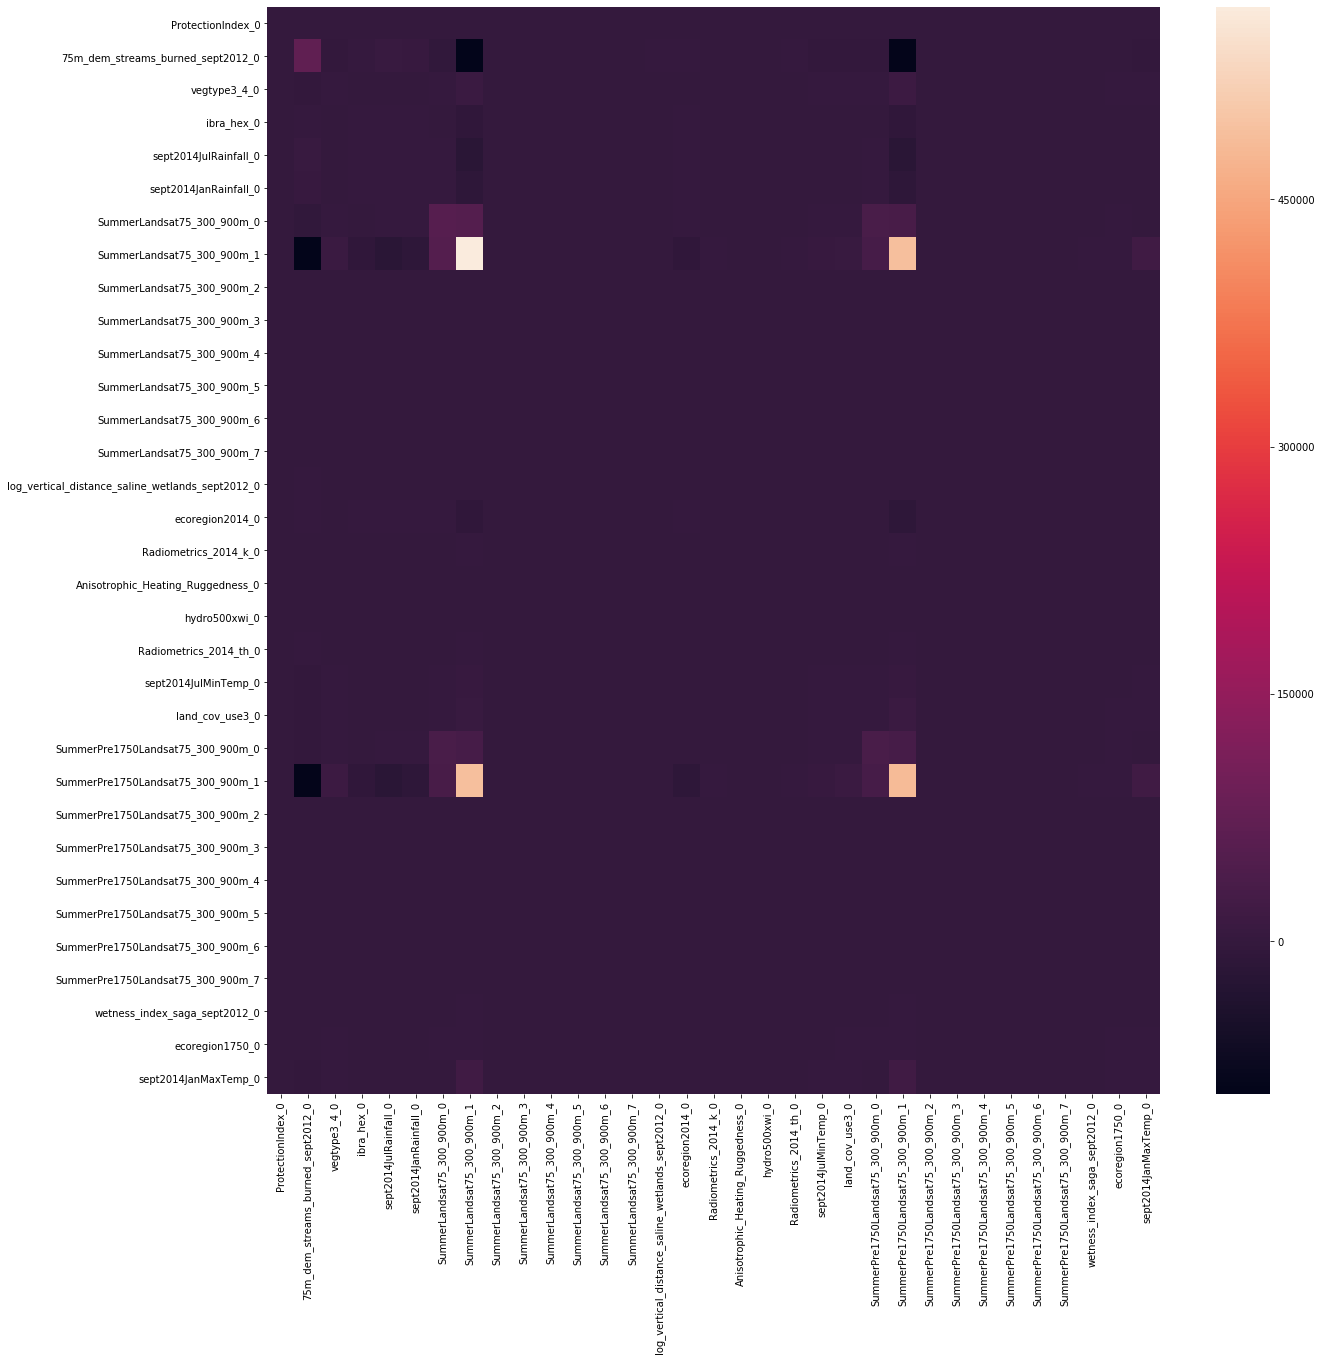

In [10]:
def plot_covariance_heatmap(df):
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.heatmap(df.cov(), ax=ax)
#     sns.heatmap(df.cov(), ax=ax, annot=True)
    
# plot_covariance_heatmap(dataset[[i+'_0' for i in get_raster_names()]])
plot_covariance_heatmap(dataset[get_raster_colnames()])

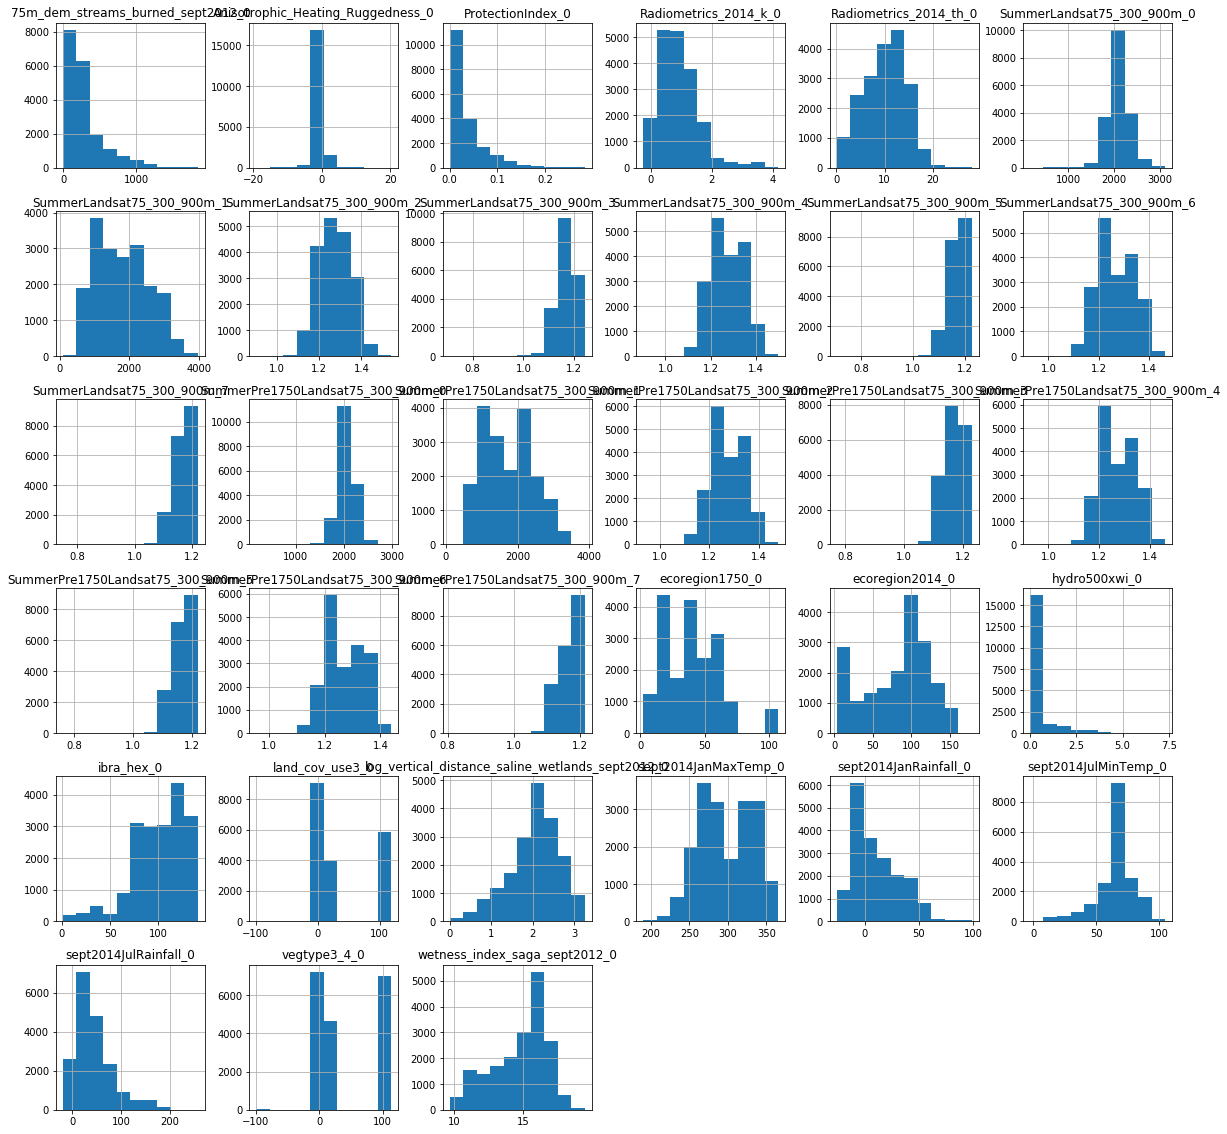

In [11]:
def plot_histogram(df):
    df.hist(figsize=(20,20))
plot_histogram(dataset[get_raster_colnames()])
# plot_histogram(dataset)

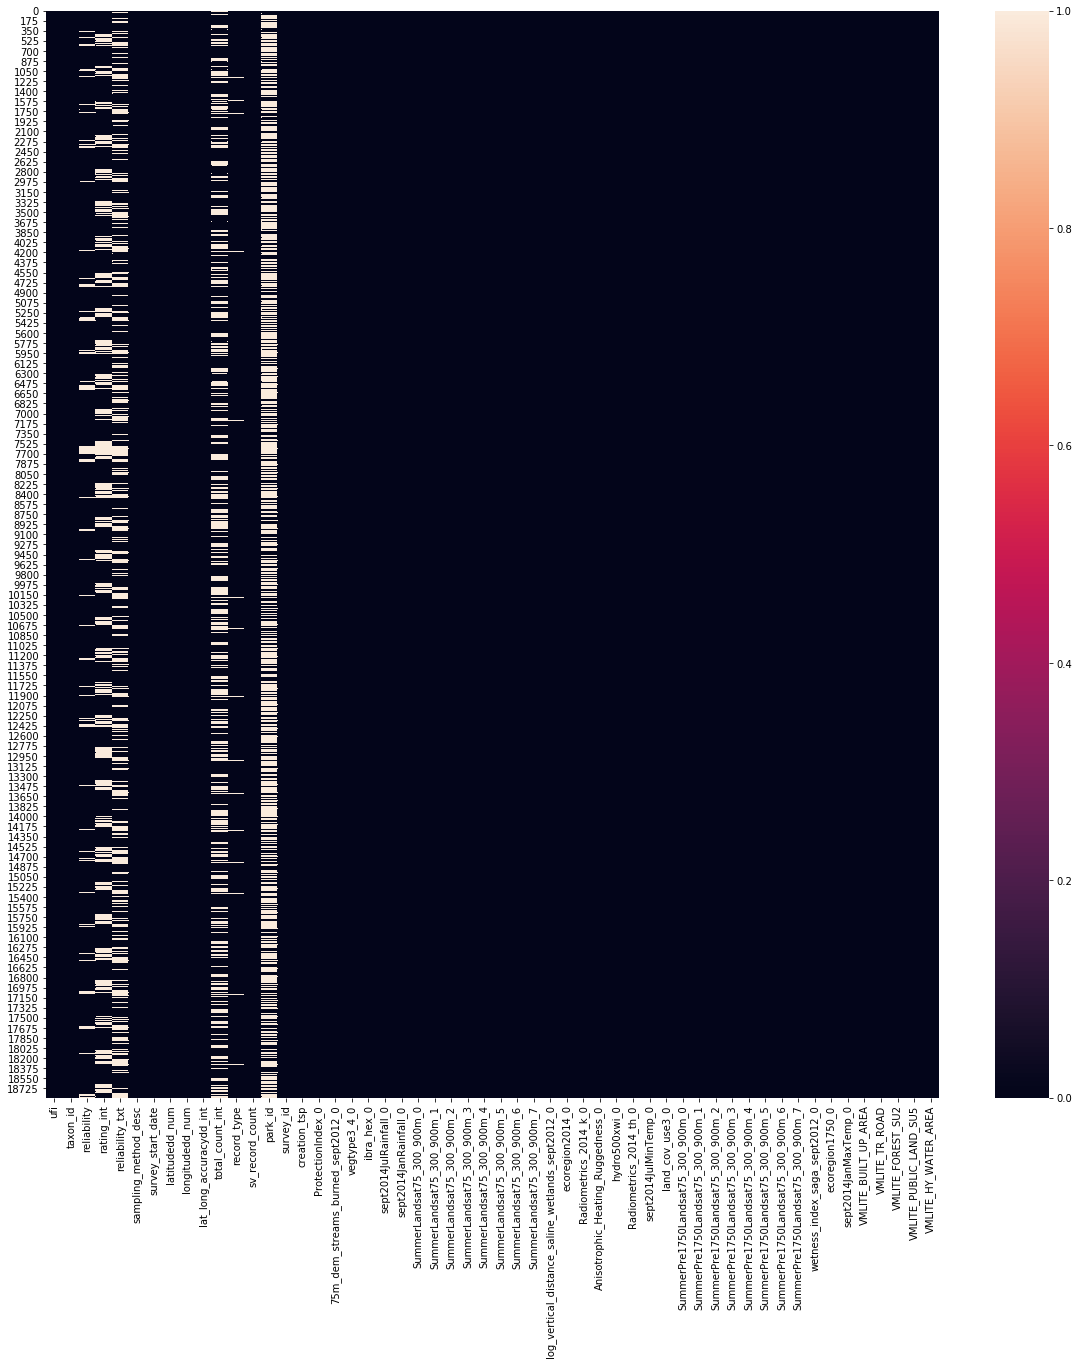

In [12]:
def plot_missing_data(df):
    fig, ax = plt.subplots(figsize=(20,20)) 
    sns.heatmap(df.isnull(), ax=ax)
plot_missing_data(dataset)

In [13]:
dataset[get_raster_colnames()].describe()

ProtectionIndex_0  75m_dem_streams_burned_sept2012_0  vegtype3_4_0  \
count       18890.000000                       18890.000000  18890.000000   
mean            0.034923                         281.192692     43.342245   
std             0.037707                         266.047709     47.724682   
min             0.000000                          -7.800000    -99.000000   
25%             0.009700                         103.199997      6.000000   
50%             0.020300                         210.000000      8.000000   
75%             0.048100                         344.200012    103.000000   
max             0.283300                        1843.199951    114.000000   

         ibra_hex_0  sept2014JulRainfall_0  sept2014JanRainfall_0  \
count  18890.000000           18890.000000           18890.000000   
mean     100.953732              43.559064              10.107400   
std       27.718728              39.414482              21.347510   
min        1.000000             -19.450100             -26.230700   
25%       83.000000              16.303101              -7.239000   
50%      106.000000              34.758699               3.284700   
75%      123.000000              61.016975              24.820101   
max      141.000000             257.779510              98.918297   

       SummerLandsat75_300_900m_0  SummerLandsat75_300_900m_1  \
count                18890.000000                18890.000000   
mean                  2094.702654                 1799.499413   
std                    235.710208                  752.950114   
min                    169.464539                   83.105675   
25%                   1951.566772                 1120.397491   
50%                   2081.180908                 1747.316772   
75%                   2228.567383                 2355.263672   
max                   3109.106445                 3982.601074   

       SummerLandsat75_300_900m_2  SummerLandsat75_300_900m_3  ...  \
count                18890.000000                18890.000000  ...   
mean                     1.273204                    1.166429  ...   
std                      0.075877                    0.034419  ...   
min                      0.902353                    0.709267  ...   
25%                      1.216671                    1.143545  ...   
50%                      1.269583                    1.172802  ...   
75%                      1.335338                    1.192575  ...   
max                      1.541675                    1.242733  ...   

       SummerPre1750Landsat75_300_900m_1  SummerPre1750Landsat75_300_900m_2  \
count                       18890.000000                       18890.000000   
mean                         1735.865197                           1.273581   
std                           694.346841                           0.070650   
min                           101.443466                           0.932310   
25%                          1108.008575                           1.219773   
50%                          1682.720215                           1.268866   
75%                          2260.232178                           1.334157   
max                          3872.786621                           1.480043   

       SummerPre1750Landsat75_300_900m_3  SummerPre1750Landsat75_300_900m_4  \
count                       18890.000000                       18890.000000   
mean                            1.166218                           1.273055   
std                             0.031577                           0.069722   
min                             0.769910                           0.927106   
25%                             1.143420                           1.219531   
50%                             1.174227                           1.268658   
75%                             1.192438                           1.334768   
max                             1.231594                           1.461327   

       SummerPre1750Landsat75_300_900m_5  SummerPr

In [14]:
from preprocess.absence_generation import get_dataset_by_species
from preprocess.absence_generation import get_coordinates_of_species
species_dataset = get_dataset_by_species(504391)
species_dataset.columns

Index(['ufi', 'taxon_id', 'reliability', 'rating_int', 'reliability_txt',
       'sampling_method_desc', 'survey_start_date', 'latitudedd_num',
       'longitudedd_num', 'lat_long_accuracydd_int', 'total_count_int',
       'record_type', 'sv_record_count', 'park_id', 'survey_id',
       'creation_tsp', 'ProtectionIndex_0',
       '75m_dem_streams_burned_sept2012_0', 'vegtype3_4_0', 'ibra_hex_0',
       'sept2014JulRainfall_0', 'sept2014JanRainfall_0',
       'SummerLandsat75_300_900m_0', 'SummerLandsat75_300_900m_1',
       'SummerLandsat75_300_900m_2', 'SummerLandsat75_300_900m_3',
       'SummerLandsat75_300_900m_4', 'SummerLandsat75_300_900m_5',
       'SummerLandsat75_300_900m_6', 'SummerLandsat75_300_900m_7',
       'log_vertical_distance_saline_wetlands_sept2012_0', 'ecoregion2014_0',
       'Radiometrics_2014_k_0', 'Anisotrophic_Heating_Ruggedness_0',
       'hydro500xwi_0', 'Radiometrics_2014_th_0', 'sept2014JulMinTemp_0',
       'land_cov_use3_0', 'SummerPre1750Landsat75_300_9

In [15]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from preprocess.transform_columns import define_raster_transforms
# raster_transforms = define_raster_transforms()

column_trans = ColumnTransformer([('standard_scaler', StandardScaler(copy=True, with_mean=True, with_std=True), species_dataset.columns)], remainder='drop')
species_dataset = pd.DataFrame(column_trans.fit_transform(species_dataset), columns=species_dataset.columns)
fig, ax = plt.subplots(figsize=(20,20)) 
covmat = species_dataset.cov()
# sns.heatmap(covmat[np.log(covmat)<=100], ax=ax)

covmat

ValueError: could not convert string to float: 'Acceptable'

In [ ]:
species_dataset.dtype != str

In [ ]:
species_dataset[get_raster_colnames()]
plot_covariance_heatmap(species_dataset[get_raster_colnames()])

In [ ]:
plot_histogram(species_dataset[get_raster_colnames()])

In [ ]:
def plot_species(taxon_id):
    from constants import PROCESSED_DATASET
    species_absence = pd.read_csv(PROCESSED_DATASET / 'absence_{}.csv'.format(taxon_id))
    failed_absence = pd.read_csv(PROCESSED_DATASET / 'failed_absence_{}.csv'.format(taxon_id))
#     len(species_absence)
    presence = pd.DataFrame(get_coordinates_of_species(taxon_id), columns = ['longitudedd_num','latitudedd_num'])
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize = (15,8))
    ax.set_title('Species {} presence/absence map'.format(taxon_id), fontsize=16)
#     plt.figure()
    plt.plot(species_absence['longitudedd_num'], species_absence['latitudedd_num'], 'bo', label = "Species outliers")
    plt.plot(failed_absence['longitudedd_num'], failed_absence['latitudedd_num'], 'go', label = "Species inliers")
    plt.plot(presence['longitudedd_num'], presence['latitudedd_num'], 'ro', label = "Presence")   
    plt.legend(prop={'size': 10})
    plt.show()
    fig.savefig('presence_absence_{}.png'.format(taxon_id), bbox_inches='tight')
    return fig


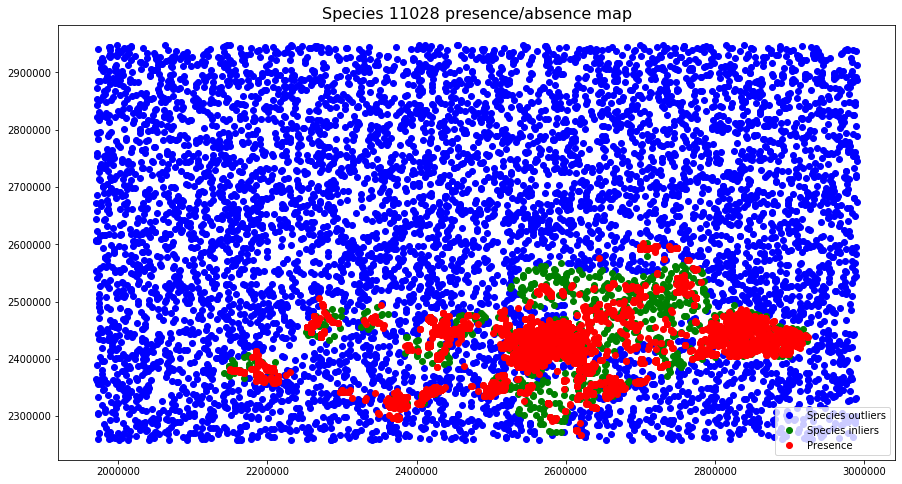

In [17]:
## Agile Antechinus
agile = plot_species(11028)

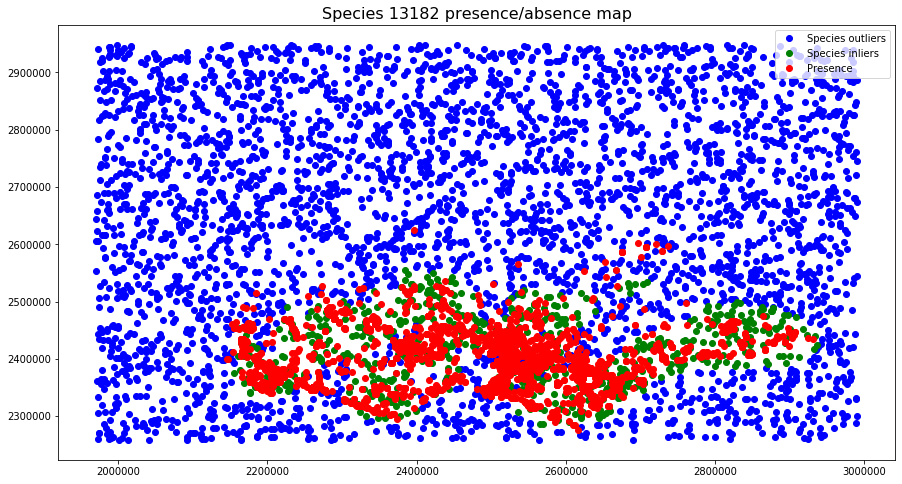

In [18]:
## Southern Brown Tree Frog
southern = plot_species(13182)

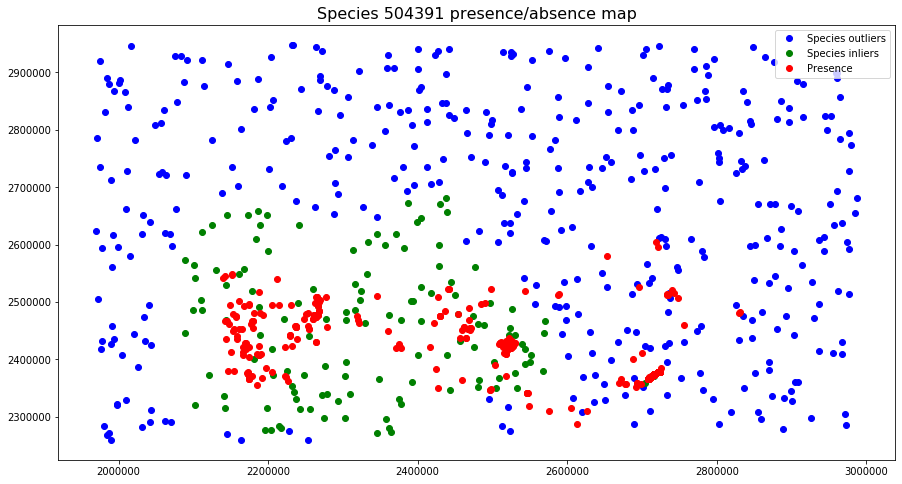

In [19]:
## Common Beard-heath
common = plot_species(504391)

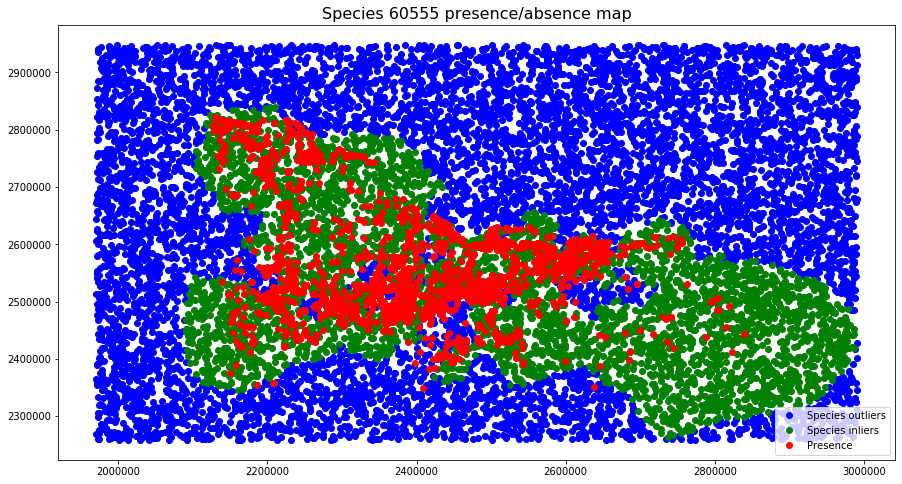

In [20]:
## Brown Treecreeper
brown = plot_species(60555)

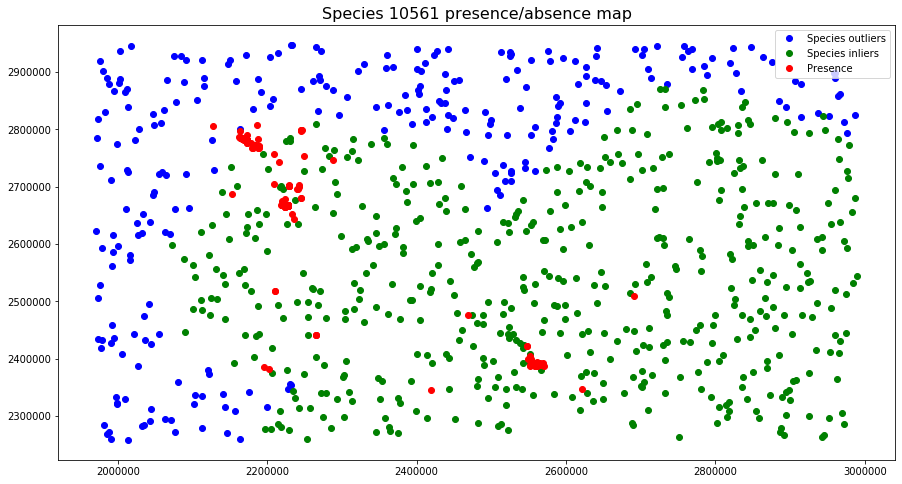

In [21]:
## White-browed Treecreeper
white = plot_species(10561)

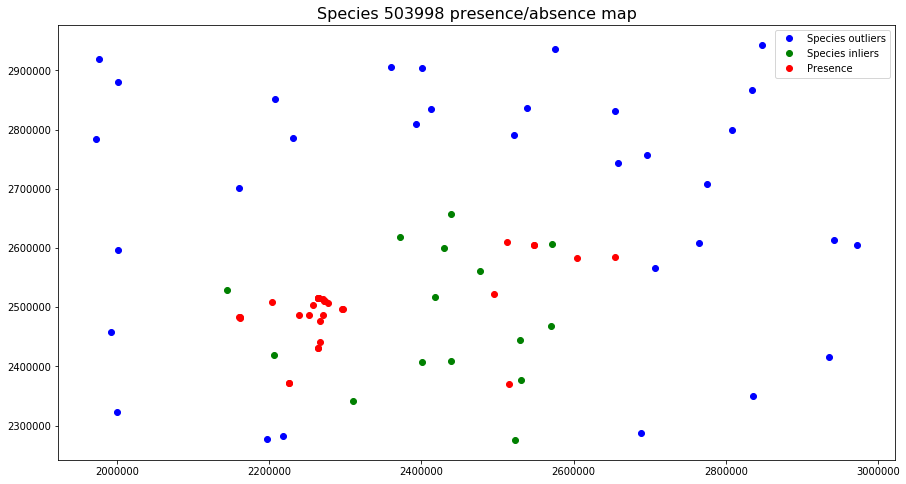

In [22]:
## Small Triggerplant
small = plot_species(503998)

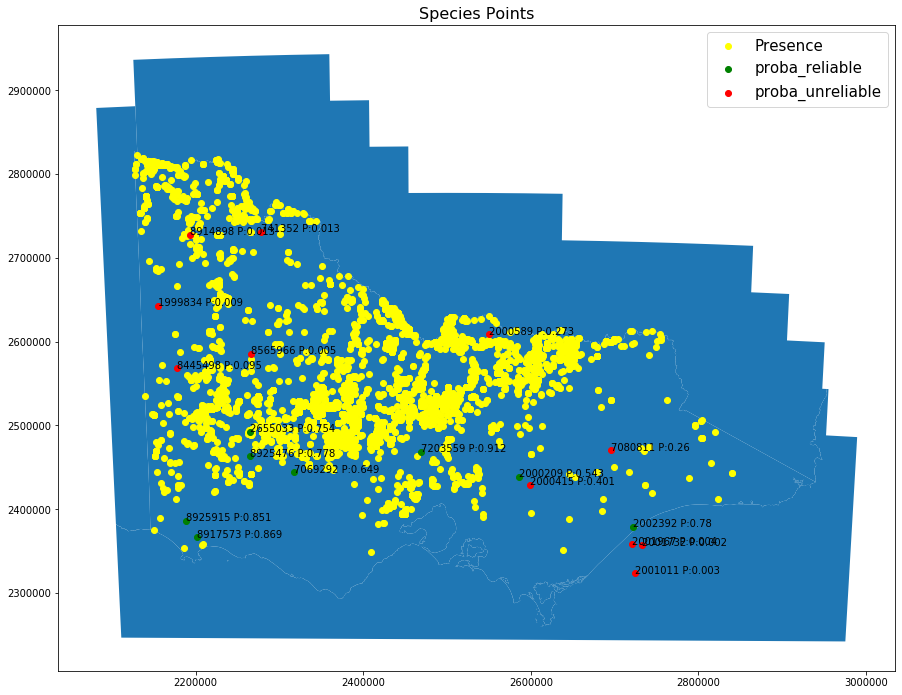

In [82]:
def transform_coords(dataframe):
    ## Here we need to transform the columns of the dataset so they are in VicGrid94
    ## Assumes latitude and longitude are uppercase
    column_data = dataframe[['latitudedd_num'.upper(),'longitudedd_num'.upper()]]
    columnOrder = ['longitudedd_num'.upper(), 'latitudedd_num'.upper()]
    column_data = column_data.reindex(columns=columnOrder)
    transformed_coord_lst = transform_coord(column_data)
    new_columns = pd.DataFrame({'longitudedd_num'.upper(): transformed_coord_lst[:, 0], 'latitudedd_num'.upper(): transformed_coord_lst[:, 1]})
    dataframe[['latitudedd_num'.upper()]] = new_columns[['latitudedd_num'.upper()]]
    dataframe[['longitudedd_num'.upper()]] = new_columns[['longitudedd_num'.upper()]]
    return dataframe

def plot_observations(taxon_id):
    ## We first need to get the shapefile that holds the map of Victoria
    from constants import SHAPEFILE_DIR
    import geopandas as gpd
    vic_map_link = SHAPEFILE_DIR / 'VMLITE_VICTORIA_POLYGON_SU5/VMLITE_VICTORIA_POLYGON_SU5.shp'
    vic_map = gpd.read_file(vic_map_link)
    
    ## We then need to get the coordinates of a certain species
    from constants import DATASET_DIR
    presence = pd.read_excel(DATASET_DIR / 'obs' / 'Monash_sample_VBA.xls')
    presence = presence[presence.TAXON_ID == int(taxon_id)]
    presence = presence.reset_index(drop=True)
    presence = transform_coords(presence)
    
    ## We can now get the new observations
    from constants import SUBMISSIONS
    path_to_submission = SUBMISSIONS / '{}_ouput.csv'.format(504391)
    new_observations = pd.read_csv(path_to_submission)
    new_observations = transform_coords(new_observations)
    
    ## Now that we have all the observations we need to make them into geometry
    from shapely.geometry import Point, Polygon
    crs = {'init': 'epsg:3111'}
    geometry = [Point(xy) for xy in zip( presence['longitudedd_num'.upper()],presence['latitudedd_num'.upper()] )]
    geo_presence = gpd.GeoDataFrame(presence, crs = crs, geometry = geometry)
    
    new_obs_geo = [Point(xy) for xy in zip( new_observations['longitudedd_num'.upper()],new_observations['latitudedd_num'.upper()] )]
    geo_new = gpd.GeoDataFrame(new_observations, crs = crs, geometry = new_obs_geo)
    
    ## Lastly we need to actually plot and save the points
    fig, ax = plt.subplots(figsize = (15,15))
    ax.set_title('Species Points', fontsize=16)
    vic_map.plot(ax = ax) # Plot Victoria
    
    y2 = list(geo_presence['longitudedd_num'.upper()])
    z2 = list(geo_presence['latitudedd_num'.upper()])
    ax.scatter(y2,z2, color='yellow', label = "Presence") # plot the presence
    
    y = list(geo_new[geo_new['reliable_prob'] > 0.5]['longitudedd_num'.upper()])
    z = list(geo_new[geo_new['reliable_prob'] > 0.5]['latitudedd_num'.upper()])
    n = list(geo_new[geo_new['reliable_prob'] > 0.5]['UFI'])
    nn = list(geo_new[geo_new['reliable_prob'] > 0.5]['reliable_prob'])
    nnew = [(str(n[i]) + ' P:' + str(round(float(nn[i]),3))) for i in range(len(n))] 
    ax.scatter(y,z, color='green', label = 'proba_reliable') # plot the 'reliable' points

    y1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['longitudedd_num'.upper()])
    z1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['latitudedd_num'.upper()])
    n1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['UFI'])
    nn1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['reliable_prob'])
    nnew1 = [(str(n1[i]) + ' P:' + str(round(float(nn1[i]),3))) for i in range(len(n1))] 
    ax.scatter(y1,z1, color='red', label = "proba_unreliable") # plot the 'unreliable' points

    
    plt.legend(prop={'size': 15})
    for i, txt in enumerate(nnew):
        ax.annotate(txt, (y[i], z[i]))

    for i, txt in enumerate(nnew1):
        ax.annotate(txt, (y1[i], z1[i]))

    fig.savefig('species_points_{}.png'.format(taxon_id), bbox_inches='tight')

    
plot_observations(60555)    

In [17]:
from constants import DATASET_DIR
presence = pd.read_excel(DATASET_DIR / 'obs' / 'Monash_sample_VBA.xls')
presence = presence[presence.TAXON_ID == int(504391)]
presence = presence.reset_index(drop=True)

column_data = presence[['latitudedd_num'.upper(),'longitudedd_num'.upper()]]
columnOrder = ['longitudedd_num'.upper(), 'latitudedd_num'.upper()]
column_data = column_data.reindex(columns=columnOrder)
transformed_coord_lst = transform_coord(column_data)
new_columns = pd.DataFrame({'longitudedd_num'.upper(): transformed_coord_lst[:, 0], 'latitudedd_num'.upper(): transformed_coord_lst[:, 1]})
presence[['latitudedd_num'.upper()]] = new_columns[['latitudedd_num'.upper()]]
presence[['longitudedd_num'.upper()]] = new_columns[['longitudedd_num'.upper()]]


In [19]:
from shapely.geometry import Point, Polygon
crs = {'init': 'epsg:3111'}
geometry = [Point(xy) for xy in zip( presence['longitudedd_num'.upper()],presence['latitudedd_num'.upper()] )]
geometry[:5]
# absence_geometry = [Point(xy) for xy in zip( species_absence_1['longitudedd_num'],species_absence_1['latitudedd_num'] )]
# inlier_geometry = [Point(xy) for xy in zip( species_inlier_1['longitudedd_num'],species_inlier_1['latitudedd_num'] )]

In [20]:
geo_presence = gpd.GeoDataFrame(presence, crs = crs, geometry = geometry)
geo_presence.head()

UFI  TAXON_ID             SCIENTIFIC_DISPLAY_NME          COMMON_NME  \
0  2001011    504391  Leucopogon virgatus var. virgatus  Common Beard-heath   
1  2001732    504391  Leucopogon virgatus var. virgatus  Common Beard-heath   
2  2001967    504391  Leucopogon virgatus var. virgatus  Common Beard-heath   
3  2002392    504391  Leucopogon virgatus var. virgatus  Common Beard-heath   
4  2655033    504391  Leucopogon virgatus var. virgatus  Common Beard-heath   

     TAXON_TYPE RELIABILITY  RATING_INT RELIABILITY_TXT  \
0  Dicotyledons  Acceptable         0.0             NaN   
1  Dicotyledons  Acceptable         0.0             NaN   
2  Dicotyledons  Acceptable         0.0             NaN   
3  Dicotyledons  Acceptable         0.0             NaN   
4  Dicotyledons  Acceptable         0.0             NaN   

                  REVIEW_COMMENT_TXT           SAMPLING_METHOD_DESC  ...  \
0                                NaN                        Quadrat  ...   
1                                NaN                        Quadrat  ...   
2                                NaN                        Quadrat  ...   
3                                NaN                        Quadrat  ...   
4  auto review from accepted distrib  Species List for Defined Area  ...   

  PRIMARY_CDE  SV_RECORD_COUNT  STATE_CDE  LGA_UFI  CMA_NO  PARK_ID SURVEY_ID  \
0       FLORA               23        VIC    370.0     9.0      NaN    392381   
1       FLORA               27        VIC    370.0     9.0      NaN    392411   
2       FLORA               32        VIC    370.0     9.0   3362.0    392419   
3       FLORA               35        VIC    370.0     9.0   3362.0    392434   
4       FLORA               51        VIC    332.0     2.0      NaN    408121   

  SITE_ORIGIN_STATUS_CDE                     CREATION_TSP  \
0                    NaN  16/AUG/11 12:00:00.000000000 AM   
1                    NaN  16/AUG/11 12:00:00.000000000 AM   
2                    NaN  16/AUG/11 12:00:00.000000000 AM   
3                    NaN  16/AUG/11 12:00:00.000000000 AM   
4                    NaN  16/AUG/11 12:00:00.000000000 AM   

                                      geometry  
0  POINT (2724394.424752171 2379103.920340701)  
1  POINT (2724233.317851171 2379446.918612407)  
2  POINT (2712327.535783065 2369672.478483133)  
3  POINT (2722041.559847175 2377747.721864318)  
4  POINT (2266799.608343426 2492504.256444325)  

[5 rows x 28 columns]

In [22]:


import os
import math
import pandas as pd
import random
import numpy as np
from osgeo import ogr
from preprocess.coord_transform import transform_coord
from preprocess.helper import pdf_to_coord
from preprocess.helper import generate_point 
from pathlib import Path
from constants import OBS_CSV, OBS_COL
from preprocess.helper import lower_colname
from load_dataset import load_dataset
from preprocess.environmental_factors_from_point import environmental_factors_from_point
from constants import PROCESSED_DATASET, SUBMISSIONS

In [75]:
from constants import SUBMISSIONS
path_to_submission = SUBMISSIONS / '{}_ouput.csv'.format(504391)
new_observations = pd.read_csv(path_to_submission)




new_observations = transform_coords(new_observations)

In [77]:
new_observations[['latitudedd_num'.upper()]].head()

LATITUDEDD_NUM
0    2.323593e+06
1    2.357014e+06
2    2.358348e+06
3    2.378857e+06
4    2.492455e+06

In [25]:
new_obs_geo = [Point(xy) for xy in zip( new_observations['longitudedd_num'.upper()],new_observations['latitudedd_num'.upper()] )]
geo_new = gpd.GeoDataFrame(new_observations, crs = crs, geometry = new_obs_geo)
geo_new.head()

Unnamed: 0      UFI  TAXON_ID             SCIENTIFIC_DISPLAY_NME  \
0           0  2001011    504391  Leucopogon virgatus var. virgatus   
1           1  2001732    504391  Leucopogon virgatus var. virgatus   
2           2  2001967    504391  Leucopogon virgatus var. virgatus   
3           3  2002392    504391  Leucopogon virgatus var. virgatus   
4           4  2655033    504391  Leucopogon virgatus var. virgatus   

           COMMON_NME    TAXON_TYPE  RELIABILITY  RATING_INT  RELIABILITY_TXT  \
0  Common Beard-heath  Dicotyledons          NaN         0.0              NaN   
1  Common Beard-heath  Dicotyledons          NaN         0.0              NaN   
2  Common Beard-heath  Dicotyledons          NaN         0.0              NaN   
3  Common Beard-heath  Dicotyledons          NaN         0.0              NaN   
4  Common Beard-heath  Dicotyledons          NaN         0.0              NaN   

                  REVIEW_COMMENT_TXT  ... STATE_CDE LGA_UFI  CMA_NO  PARK_ID  \
0                                NaN  ...       VIC     370     9.0      NaN   
1                                NaN  ...       VIC     370     9.0      NaN   
2                                NaN  ...       VIC     370     9.0   3362.0   
3                                NaN  ...       VIC     370     9.0   3362.0   
4  auto review from accepted distrib  ...       VIC     332     2.0      NaN   

   SURVEY_ID  SITE_ORIGIN_STATUS_CDE             CREATION_TSP  reliable_prob  \
0     392381                     NaN  2011-08-16 00:00:00.000       0.003059   
1     392411                     NaN  2011-08-16 00:00:00.000       0.002317   
2     392419                     NaN  2011-08-16 00:00:00.000       0.004304   
3     392434                     NaN  2011-08-16 00:00:00.000       0.780319   
4     408121                     NaN  2011-08-16 00:00:00.000       0.754088   

  unreliable_prob                                     geometry  
0        0.996941   POINT (2723775.04018767 2323592.994670157)  
1        0.997683  POINT (2732387.235713708 2357014.333875279)  
2        0.995696   POINT (2720796.234788871 2358347.96701209)  
3        0.219681   POINT (2722071.06505031 2378857.332184114)  
4        0.245912  POINT (2265021.224784944 2492455.077986247)  

[5 rows x 31 columns]

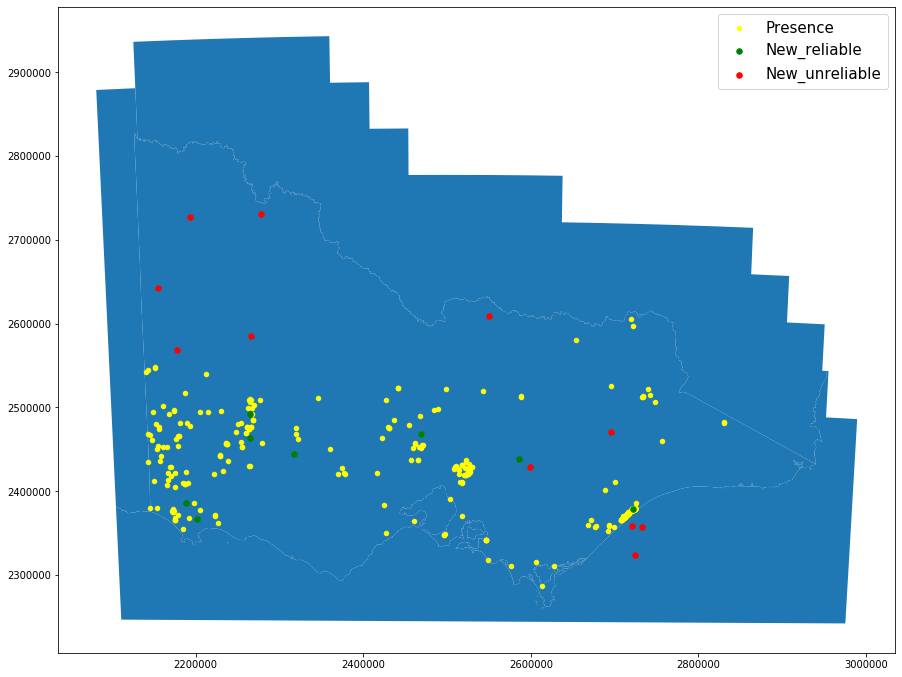

In [27]:
fig, ax = plt.subplots(figsize = (15,15))
vic_map.plot(ax = ax)
geo_presence.plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'Presence')
geo_new[geo_new['reliable_prob'] > 0.5].plot(ax = ax, markersize = 30, color = 'green', marker = 'o', label = 'New_reliable')
geo_new[geo_new['reliable_prob'] <= 0.5].plot(ax = ax, markersize = 30, color = 'red', marker = 'o', label = 'New_unreliable')
plt.legend(prop={'size': 15})


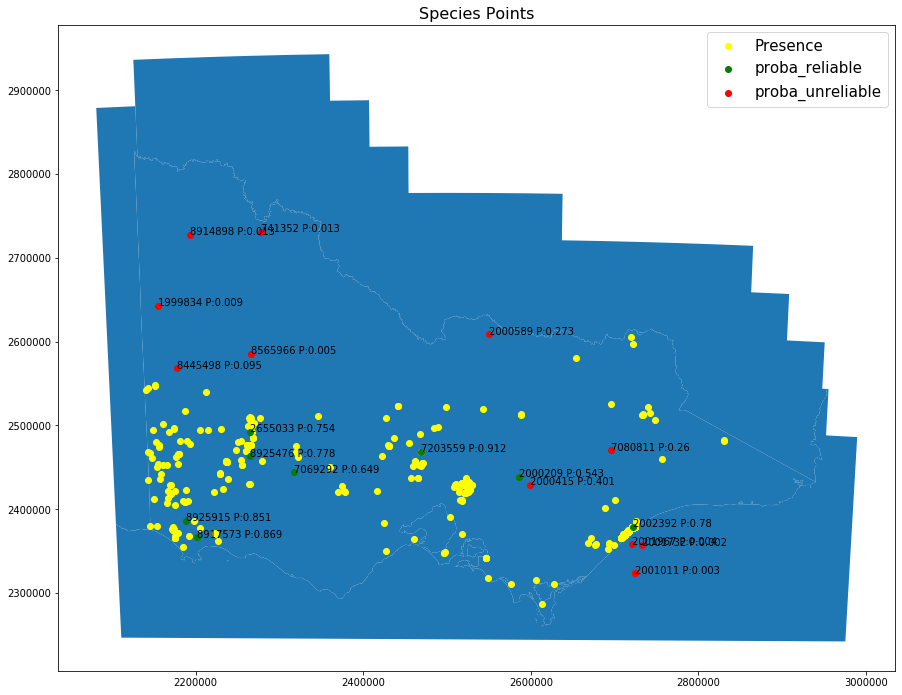

In [74]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_title('Species Points', fontsize=16)
vic_map.plot(ax = ax)
y2 = list(geo_presence['longitudedd_num'.upper()])
z2 = list(geo_presence['latitudedd_num'.upper()])
ax.scatter(y2,z2, color='yellow', label = "Presence")
y = list(geo_new[geo_new['reliable_prob'] > 0.5]['longitudedd_num'.upper()])
z = list(geo_new[geo_new['reliable_prob'] > 0.5]['latitudedd_num'.upper()])
n = list(geo_new[geo_new['reliable_prob'] > 0.5]['UFI'])
nn = list(geo_new[geo_new['reliable_prob'] > 0.5]['reliable_prob'])
nnew = [(str(n[i]) + ' P:' + str(round(float(nn[i]),3))) for i in range(len(n))] 
ax.scatter(y,z, color='green', label = 'proba_reliable')

y1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['longitudedd_num'.upper()])
z1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['latitudedd_num'.upper()])
n1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['UFI'])
nn1 = list(geo_new[geo_new['reliable_prob'] <= 0.5]['reliable_prob'])
nnew1 = [(str(n1[i]) + ' P:' + str(round(float(nn1[i]),3))) for i in range(len(n1))] 
ax.scatter(y1,z1, color='red', label = "proba_unreliable")

# geo_presence.plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'Presence')
# geo_new[geo_new['reliable_prob'] > 0.5].plot(ax = ax, markersize = 30, color = 'green', marker = 'o', label = 'New_reliable')
# geo_new[geo_new['reliable_prob'] <= 0.5].plot(ax = ax, markersize = 30, color = 'red', marker = 'o', label = 'New_unreliable')
plt.legend(prop={'size': 15})
for i, txt in enumerate(nnew):
    ax.annotate(txt, (y[i], z[i]))
    
for i, txt in enumerate(nnew1):
    ax.annotate(txt, (y1[i], z1[i]))

fig.savefig('species_points.png', bbox_inches='tight')